In [1]:
#Importing required libraries
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import numpy as np
from scipy.stats import kurtosis
from sklearn.model_selection import train_test_split
from sklearn import svm
import pylab as pl

In [2]:
#Setting directory and uploading file
#Everyone, please set your own path here
os.getcwd()
path = os.chdir('C://Users//ashok//Desktop//UIC//spring 2020//python 400//project')
hdc = pd.read_csv("processed_cleveland_data.csv")
hdc.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


The dataset contains attributes describing range of conditions that affect the heart, this data is collected for people from Cleveland . The detailed description are available in the report. The response variable/dependent variable is 'num' which has values 0-4, 0 indicates absence and any value from 1-4 means presence of heart disease.

In [3]:
#Getting the data types of all variables in the dataframe 
for name, dtype in hdc.dtypes.iteritems():
    print(name, dtype)

age int64
sex int64
cp int64
trestbps int64
chol int64
fbs int64
restecg int64
thalach int64
exang int64
oldpeak float64
slope int64
ca object
thal object
num int64


In [4]:
#Count of NA/Missing in each column
hdc.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

All the data types are primarily in the integer format, except 'ca' and 'thal' which are in object. Even though the count of all columns shows zero, ca and than contain few "?" which are equivalent to null/NA. These values need to be imputed by median. Some of columns eg Sex, Fbs and Exang have binary values '0' and '1' 

In [5]:
#Replacing '?' with NaN
hdc = hdc.replace('?', np.nan)
print(hdc)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca thal  num  
0        3    0    6    0  
1        2    3    3    2  
2  

In [6]:
#Finding and Imputing median values for 'ca' and 'thal' columns
hdc.median()

hdc['ca'] = hdc['ca'].fillna(hdc['ca'].median())
hdc['thal'] = hdc['thal'].fillna(hdc['thal'].median())

In [7]:
#Summary statistics for the dataset 
hdc.describe().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00


The age range is from 29-77 for both males and females. The resting blood pressure seems to be fluctuating between a regular range of 94-200mmHg which is normal as it increases with age. Resting heart rate has very high max value. Resting of the values are in binary format or have codes, which will be explored further.

In [8]:
#For converting the response variable into binary, we are re-mapping 1,2,3 and 4 to '1' indicating 
#presence of heart disease. For ease of understanding graphs, we are re-mapping sex values to males and females
hdc['num'] = hdc.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
hdc['sex'] = hdc.sex.map({0: 'female', 1: 'male'})

#Converting the numerical response variable into categorical variable
hdc['num'] = hdc.num.map({0: 'Safe', 1:'At Risk'})

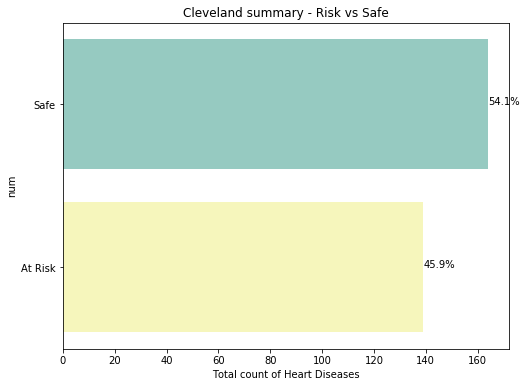

In [9]:
#Cleveland heartdisease - Overall Summary 
plt.figure(figsize=(8,6))
dist=sb.countplot(y='num',data=hdc,palette='Set3')
plt.title('Cleveland summary - Risk vs Safe')
plt.xlabel('Total count of Heart Diseases')

count = len(hdc['num'])
for p in dist.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        dist.annotate(percentage, (x, y))

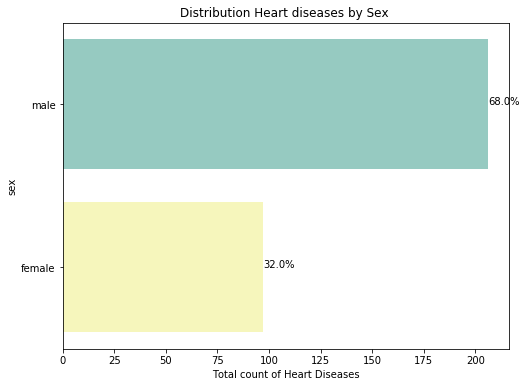

In [10]:
#Checking heart disease data as per sex 
plt.figure(figsize=(8,6))
dist=sb.countplot(y='sex',data=hdc,palette='Set3')
plt.title('Distribution Heart diseases by Sex ')
plt.xlabel('Total count of Heart Diseases')

count = len(hdc['num'])
for p in dist.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/count)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        dist.annotate(percentage, (x, y))

We observe that males are almost 2 twice as prone to risk and overall heart diseases as compared to  females.

<Figure size 1440x360 with 0 Axes>

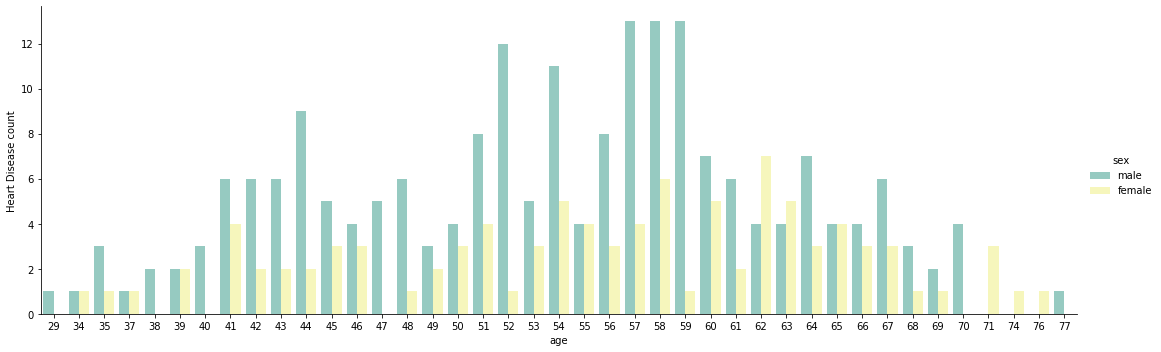

In [11]:
#Understanding age-wise split for contracting heart disease or not
plt.figure(figsize=(20,5))
grid = sb.catplot(x="age", hue="sex", data=hdc, kind="count", palette="Set3",height=5,aspect=3)
grid.set_ylabels("Heart Disease count")

Here we get the distribution of heart diseases by males and females as per their age. We see that the ages 57-59 yrs are most prone to heart diseases for male category and female risk peaks at 58 and 62yrs. 

In [12]:
#In order to perform more analysis creating copy
newhdc=hdc.copy()

In [13]:
newhdc['Thalassemia'] = newhdc.restecg.map({0: 'Normal', 1: 'Fixed defect', 2: 'Reversible defect'})
newhdc['resting ecg'] = newhdc.restecg.map({0: 'normal', 1: 'st-t wave', 2: 'left ventricular hypertrophy'})
newhdc['chestpain'] = newhdc.cp.map({1: 'typical angina', 2: 'atypical angina',3: 'non-anginal pain',4: 'asymptotic'})
newhdc['age_bins'] = pd.cut(x=newhdc['age'], bins=[20,29,39,49,59,69,79])
newhdc['age_by_decade'] = pd.cut(x=newhdc['age'], bins=[20,29,39,49,59,69,79], labels=['20s','30s','40s','50s','60s','70s'])

In [14]:
newhdc.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,Thalassemia,resting ecg,chestpain,age_bins,age_by_decade
0,63,male,1,145,233,1,2,150,0,2.3,3,0,6,Safe,Reversible defect,left ventricular hypertrophy,typical angina,"(59, 69]",60s
1,67,male,4,160,286,0,2,108,1,1.5,2,3,3,At Risk,Reversible defect,left ventricular hypertrophy,asymptotic,"(59, 69]",60s
2,67,male,4,120,229,0,2,129,1,2.6,2,2,7,At Risk,Reversible defect,left ventricular hypertrophy,asymptotic,"(59, 69]",60s
3,37,male,3,130,250,0,0,187,0,3.5,3,0,3,Safe,Normal,normal,non-anginal pain,"(29, 39]",30s
4,41,female,2,130,204,0,2,172,0,1.4,1,0,3,Safe,Reversible defect,left ventricular hypertrophy,atypical angina,"(39, 49]",40s


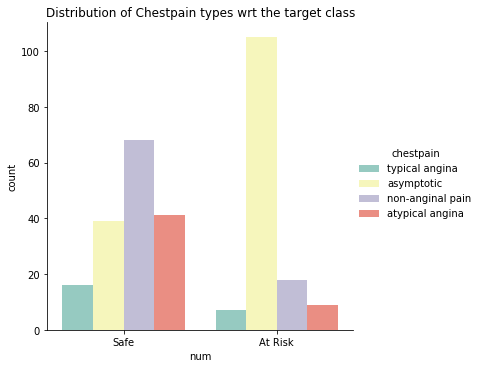

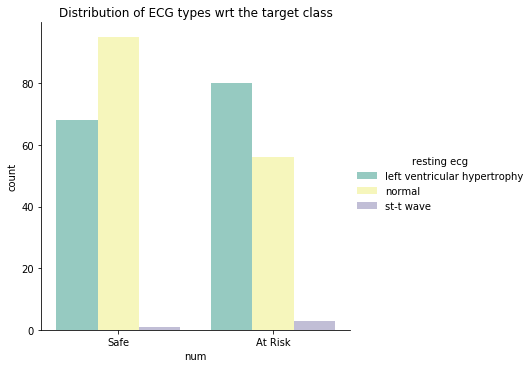

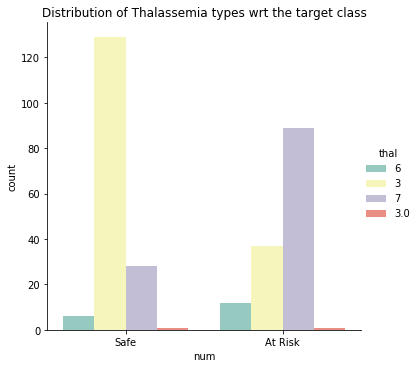

In [15]:
#Understanding how chestpain type impacts presence or absence of heart disease
sb.catplot(kind = 'count', data = newhdc, x = 'num', hue = 'chestpain',palette='Set3')
plt.title('Distribution of Chestpain types wrt the target class')
plt.show()

#Understanding how ECG type impacts presence or absence of heart disease
sb.catplot(kind = 'count', data = newhdc, x = 'num', hue = 'resting ecg',palette='Set3')
plt.title('Distribution of ECG types wrt the target class')
plt.show()

#Understanding how ECG type impacts presence or absence of heart disease
sb.catplot(kind = 'count', data = newhdc, x = 'num', hue = 'thal',palette='Set3')
plt.title('Distribution of Thalassemia types wrt the target class')
plt.show()

We see that patients with asymptomatic chest pain type have most propencity to get heart diseases. This is usually risky because one can never understand till the very end and condition of the patient can deteriote quickly. Likewise, patients with left ventricular hypertrophy (thickening of heart's wall) results in high risk for heart diseases.

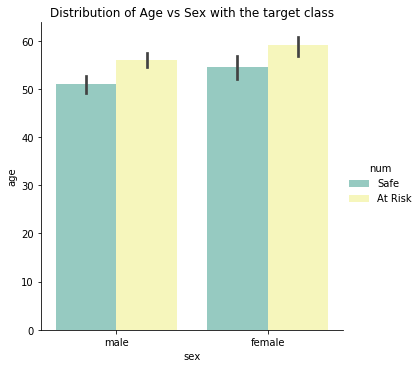

In [16]:
#Understanding how males and females by age are at risk for heart diseases
sb.catplot(kind = 'bar', data = newhdc, y = 'age', x = 'sex', hue = 'num', palette='Set3')
plt.title('Distribution of Age vs Sex with the target class')
plt.show()

In [17]:
hdc.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,male,1,145,233,1,2,150,0,2.3,3,0,6,Safe
1,67,male,4,160,286,0,2,108,1,1.5,2,3,3,At Risk
2,67,male,4,120,229,0,2,129,1,2.6,2,2,7,At Risk
3,37,male,3,130,250,0,0,187,0,3.5,3,0,3,Safe
4,41,female,2,130,204,0,2,172,0,1.4,1,0,3,Safe


Text(0, 0.5, 'Frequency')

<Figure size 1224x720 with 0 Axes>

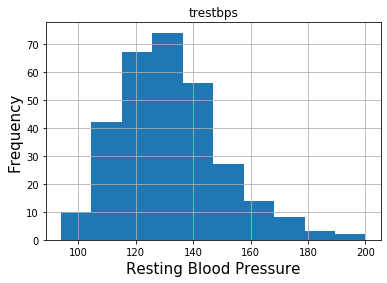

<Figure size 1224x720 with 0 Axes>

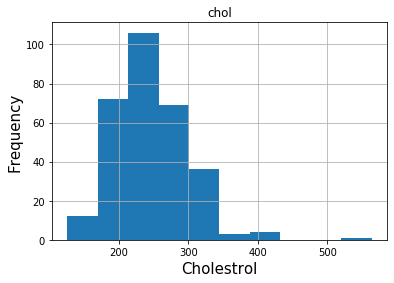

<Figure size 1224x720 with 0 Axes>

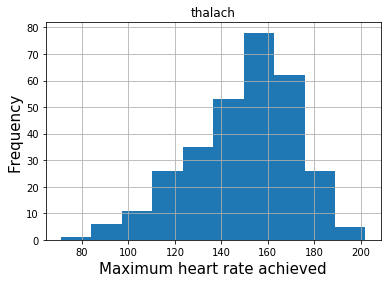

In [18]:
#Plotting histograms to check for skewness of the numerical values.
#We can also see that scales of the data is different, so we can normalize few columns
#Blood Pressure
fig=plt.figure(figsize=(17,10))
hdc.hist(column="trestbps")
plt.xlabel("Resting Blood Pressure",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#Cholestrol
fig=plt.figure(figsize=(17,10))
hdc.hist(column="chol")
plt.xlabel("Cholestrol",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
#Maximum heart rate
fig=plt.figure(figsize=(17,10))
hdc.hist(column="thalach")
plt.xlabel("Maximum heart rate achieved",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

<Figure size 1224x720 with 0 Axes>

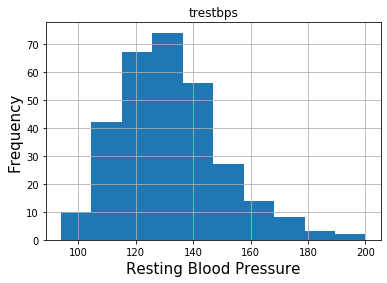

<Figure size 1224x720 with 0 Axes>

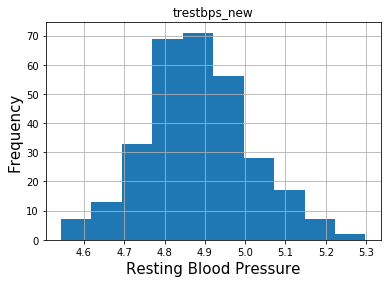

<Figure size 1224x720 with 0 Axes>

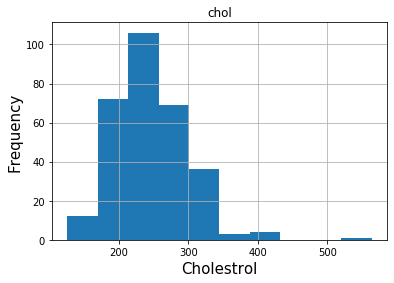

<Figure size 1224x720 with 0 Axes>

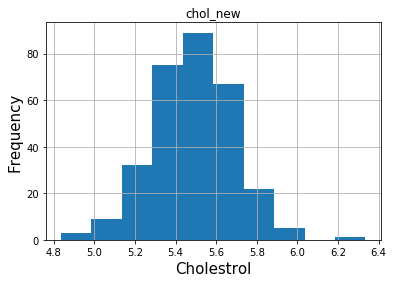

<Figure size 1224x720 with 0 Axes>

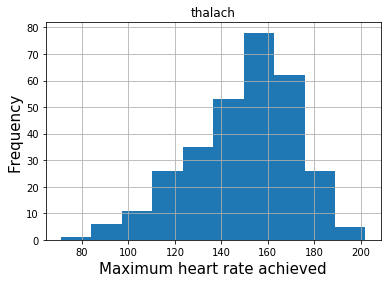

<Figure size 1224x720 with 0 Axes>

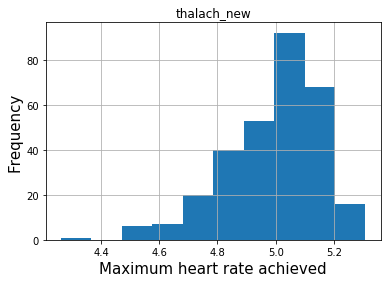

In [19]:
#Need to normalize few columns - Chol , Blood Pressure and Heart rate
from sklearn import preprocessing
list1=['trestbps', 'chol', 'thalach']
list2=['trestbps_new', 'chol_new', 'thalach_new']
for i in range(3):
    hdc[list2[i]]=np.log(hdc[list1[i]])

    
list3=["Resting Blood Pressure","Cholestrol","Maximum heart rate achieved"]
for i in range(3):
    fig=plt.figure(figsize=(17,10))
    hdc.hist(column=list1[i])
    plt.xlabel(list3[i],fontsize=15)
    plt.ylabel("Frequency",fontsize=15)
    
    fig=plt.figure(figsize=(17,10))
    hdc.hist(column=list2[i])
    plt.xlabel(list3[i],fontsize=15)
    plt.ylabel("Frequency",fontsize=15)

In [20]:
#Deleting older columns because new columns are created using log transformations
hdc.drop(['trestbps', 'chol','thalach'], axis=1)

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,num,trestbps_new,chol_new,thalach_new
0,63,male,1,1,2,0,2.3,3,0,6,Safe,4.976734,5.451038,5.010635
1,67,male,4,0,2,1,1.5,2,3,3,At Risk,5.075174,5.655992,4.682131
2,67,male,4,0,2,1,2.6,2,2,7,At Risk,4.787492,5.433722,4.859812
3,37,male,3,0,0,0,3.5,3,0,3,Safe,4.867534,5.521461,5.231109
4,41,female,2,0,2,0,1.4,1,0,3,Safe,4.867534,5.318120,5.147494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,1,0,0,0,1.2,2,0,7,At Risk,4.700480,5.575949,4.882802
299,68,male,4,1,0,0,3.4,2,2,7,At Risk,4.969813,5.262690,4.948760
300,57,male,4,0,0,1,1.2,2,1,7,At Risk,4.867534,4.875197,4.744932
301,57,female,2,0,2,0,0.0,2,1,3,At Risk,4.867534,5.463832,5.159055


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [22]:
from sklearn import preprocessing
x=hdc.iloc[:, 0: 13].values
y=hdc.iloc[:,13].values

#testing
x, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
x_trn, x_tst, y_trn, y_tst = train_test_split(x, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_trn = scaler.fit_transform(x_trn)
x_tst = scaler.transform(x_tst)

In [23]:
classifier = LogisticRegression(random_state = 1, solver = 'lbfgs')
classifier.fit(x_trn, y_trn)
y_pred = classifier.predict(x_tst)
y_pred_trn = classifier.predict(x_trn)
print('Accuracy of logistic regression classifier on Test set: {:.2f}'.format(classifier.score(x_tst, y_tst)))

Accuracy of logistic regression classifier on Test set: 0.86


In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
conma_trn = confusion_matrix(y_trn, y_pred_trn)
conma = confusion_matrix(y_tst, y_pred)
#Accuracy for Both Train and Test
acc_trn = accuracy_score(y_trn, y_pred_trn)
acc= accuracy_score(y_tst, y_pred)

print('Logistic Regression: ')
print('Accuracy on Train set: ', acc_trn)
print('Confustion Matrix for Test set:\n ', conma_trn)
print('Accuracy on Test set: ', acc)
print('Confustion Matrix for Test set:\n ', conma)

#Report for Both Train and Test

print("Report on Train set: ")
print(classification_report(y_trn, y_pred_trn))
print("------------------------------------------------------")
print("Report on Test set: ")
print(classification_report(y_tst, y_pred))

Logistic Regression: 
Accuracy on Train set:  0.8475
Confustion Matrix for Test set:
  [[345  66]
 [ 56 333]]
Accuracy on Test set:  0.86
Confustion Matrix for Test set:
  [[77 13]
 [15 95]]
Report on Train set: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       411
           1       0.83      0.86      0.85       389

    accuracy                           0.85       800
   macro avg       0.85      0.85      0.85       800
weighted avg       0.85      0.85      0.85       800

------------------------------------------------------
Report on Test set: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        90
           1       0.88      0.86      0.87       110

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200



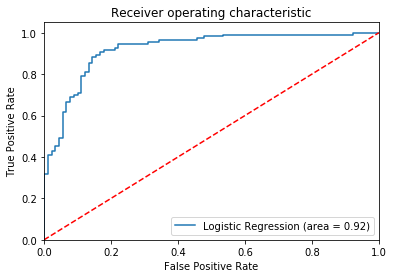

AUC: 0.92


In [25]:
probs = classifier.predict_proba(x_tst)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_tst, probs)
fpr, tpr, thresholds = roc_curve(y_tst, probs)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
auc = roc_auc_score(y_tst, probs)
print('AUC: %.2f' % auc)

In [26]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#Grid Search
def dtree_grid_search(x,y,nfolds):
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'min_samples_split' : range(2,20,2)}
    # decision tree model
    dtree_model=DecisionTreeClassifier(random_state=45)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid,cv=nfolds)
    #fit model to data
    dtree_gscv.fit(x, y)
    return dtree_gscv.best_params_

print(dtree_grid_search(x_trn,y_trn,5))

{'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 14}


In [27]:
#create decision tree object
clf=DecisionTreeClassifier(criterion= 'gini', max_depth=4,min_samples_split=14,random_state=0)
#Train decision tree classifer
clf=clf.fit(x_trn,y_trn)
#variable importance
variable_import=dict(zip(x_trn.columns, clf.feature_importances_))
print(variable_import)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [28]:
from sklearn import metrics
#Predict the response for train dataset
ypred_train = clf.predict(x_trn)
#Predict the response for test dataset
ypred_test = clf.predict(x_tst)

# Model Accuracy, how often is the classifier correct?
print("Accuracy on train set:",metrics.accuracy_score(y_trn, ypred_train))
#print("Accuracy on test set:",metrics.accuracy_score(y_tst, ypred_test))

#Confusion matrix on train set
confusionMatrix_DT_train=confusion_matrix(y_trn,ypred_train)
#print("Confusion Matrix Decision Tree for train set:\n",confusionMatrix_DT_train)

#Confusion matrix on test set
confusionMatrix_DT_test=confusion_matrix(y_tst,ypred_test)
#print("Confusion Matrix Decision Tree for test set:\n",confusionMatrix_DT_test)

#Classification report
print("Report on train set:\n", classification_report(y_trn, ypred_train))
print("Report on test set:\n", classification_report(y_tst, ypred_test))

Accuracy on train set: 0.89125
Report on train set:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       411
           1       0.86      0.92      0.89       389

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Report on test set:
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        90
           1       0.82      0.89      0.86       110

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



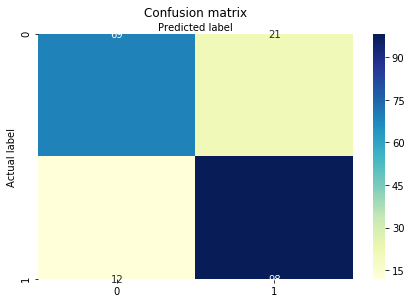

Confusion matrix of Decision Tree model : 83.5%


In [29]:
title="Confusion matrix of Decision Tree model"
cnf_matrix = metrics.confusion_matrix(y_tst, ypred_test)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print('\033[1m\033[36m{0} : {1}%'.format(title,(metrics.accuracy_score(y_tst, ypred_test))*100))

AUC:  0.8636868686868687


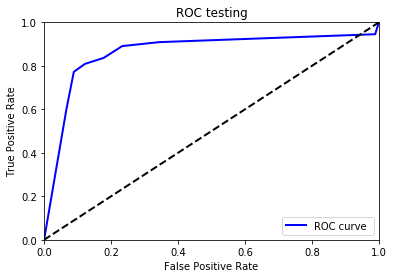

In [30]:
#ROC on train
from sklearn.metrics import roc_curve, auc
#ROC on test
ytest_probs = clf.predict_proba(x_tst)

fpr, tpr, _ = roc_curve(y_tst, ytest_probs[:, 1])
roc_auc = auc(fpr, tpr)
#ROC curve 
print("AUC: ",roc_auc)

#Plot ROC
plt.figure()

plt.plot(fpr, tpr, color='blue', lw=2,label='ROC curve ')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC testing')
plt.legend(loc="lower right")
plt.show()


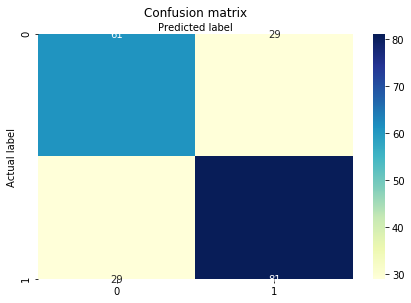

Confusion matrix of KNN model : 71.0%


In [31]:
#knn Classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3).fit(x_trn, y_trn)
#Prediction
prediction = neigh.predict(x_tst)
prediction1=pd.DataFrame(prediction)
#Accuracy
from sklearn import metrics
metrics.accuracy_score(y_tst, prediction)
title="Confusion matrix of KNN model"
cnf_matrix = metrics.confusion_matrix(y_tst, prediction)
cnf_matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

print('\033[1m\033[36m{0} : {1}%'.format(title,(metrics.accuracy_score(y_tst, prediction))*100))


AUC: 0.75


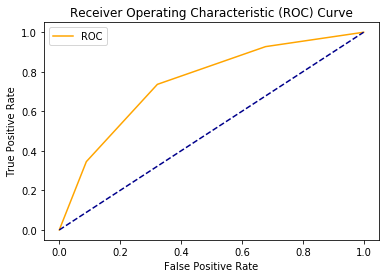

In [32]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
probs = neigh.predict_proba(x_tst)
probs = probs[:, 1]
auc = roc_auc_score(y_tst, probs)
print('AUC: %.2f' % auc)
fpr, tpr, thresholds = roc_curve(y_tst, probs)
plot_roc_curve(fpr, tpr)

In [42]:
# Now Using SVM Algorithm 
from sklearn.svm import SVC
#classifier=SVC(kernel='rbf',random_state=0).fit(Xtrain,ytrain)
classifier = svm.SVC(kernel='linear', probability=True)
probas_ = classifier.fit(x_trn, y_trn).predict_proba(x_tst)
#classifier.fit(Xtrain,ytrain)


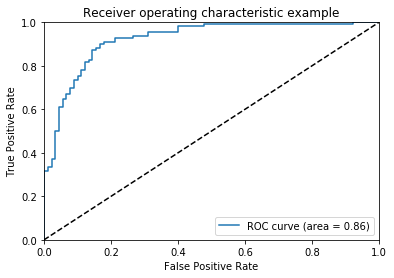

In [44]:
pl.clf()
pl.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiver operating characteristic example')
pl.legend(loc="lower right")
pl.show()

In [45]:
#Predict
y_pred=classifier.predict(x_tst)
prediction2=pd.DataFrame(y_pred)
prediction2.head()

,0
0,0
1,1
2,1
3,1
4,1


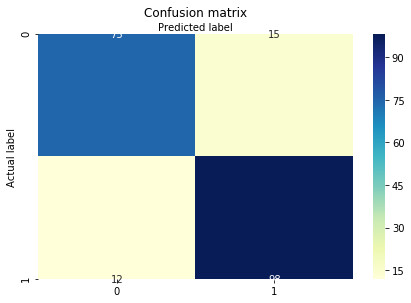

Confusion matrix of SVM : 86.5%


In [46]:
#Accuracy
metrics.accuracy_score(y_tst, prediction2)

title="Confusion matrix of SVM"
cnf_matrix = metrics.confusion_matrix(y_tst, y_pred)
cnf_matrix
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
print('\033[1m\033[36m{0} : {1}%'.format(title,(metrics.accuracy_score(y_tst, y_pred))*100))